<a href="https://colab.research.google.com/github/pranay-dasari/RandD/blob/main/ola.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv
To: /content/ola_driver_scaler.csv
100% 1.13M/1.13M [00:00<00:00, 28.4MB/s]


In [25]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
import seaborn as sns
warnings.filterwarnings("ignore")
df = pd.read_csv("/content/ola_driver_scaler.csv")

In [26]:
df

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,19099,08/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,740280,3
19100,19100,09/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,448370,3
19101,19101,10/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,0,2
19102,19102,11/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,200420,2


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [28]:
df.describe()

,Unnamed: 0,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,9551.500000,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,5514.994107,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,0.000000,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,4775.750000,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,9551.500000,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,14327.250000,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,19103.000000,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


In [29]:
df['Gender'].value_counts()

,count
Gender,
0.0,11074
1.0,7978


In [30]:
df.isna().sum()
original_df = df.copy()
original_df.isna().sum()

,0
Unnamed: 0,0
MMM-YY,0
Driver_ID,0
Age,61
Gender,52
City,0
Education_Level,0
Income,0
Dateofjoining,0
LastWorkingDate,17488


In [31]:
df['City'] = df['City'].astype(str).replace(r'^C', '', regex=True)
df['City'].astype(str)
df = df.sort_values(by='Driver_ID')
df

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
1,1,02/01/19,1,28.0,0.0,23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,23,2,57387,24/12/18,03/11/19,1,1,0,2
0,0,01/01/19,1,28.0,0.0,23,2,57387,24/12/18,NaN,1,1,2381060,2
3,3,11/01/20,2,31.0,0.0,7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,7,2,67016,11/06/20,NaN,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,19099,08/01/20,2788,30.0,0.0,27,2,70254,06/08/20,NaN,2,2,740280,3
19100,19100,09/01/20,2788,30.0,0.0,27,2,70254,06/08/20,NaN,2,2,448370,3
19102,19102,11/01/20,2788,30.0,0.0,27,2,70254,06/08/20,NaN,2,2,200420,2
19101,19101,10/01/20,2788,30.0,0.0,27,2,70254,06/08/20,NaN,2,2,0,2


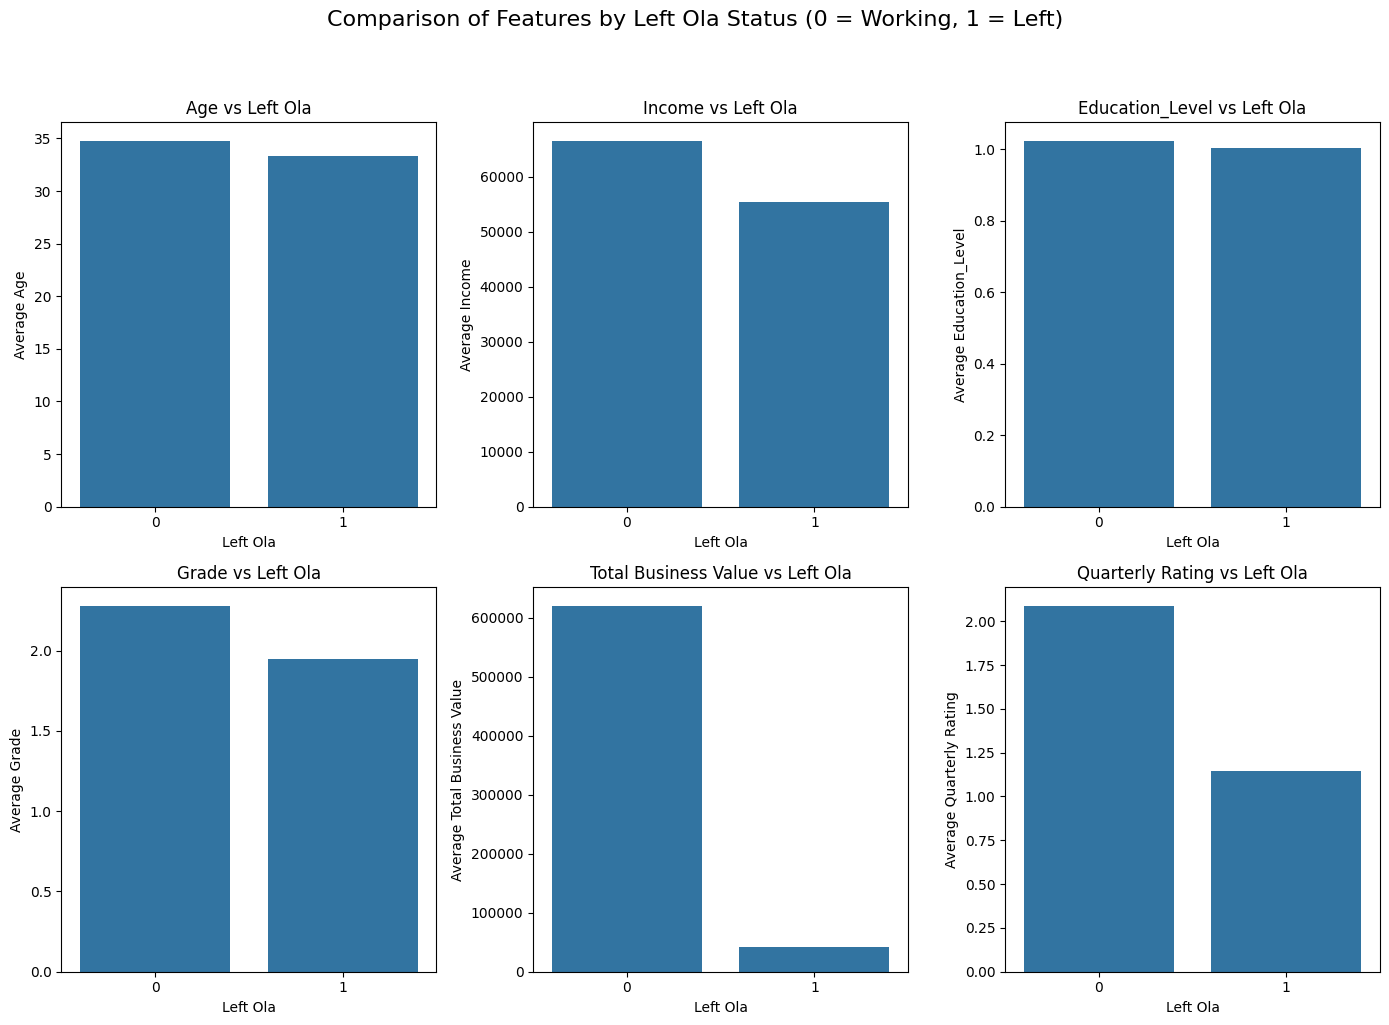

In [32]:

# Create 'left_ola' column based on LastWorkingDate
df['left_ola'] = df['LastWorkingDate'].notna().astype(int)

# Columns to plot
columns_to_plot = [
    'Age',
    'Income',
    'Education_Level',
    'Grade',
    'Total Business Value',
    'Quarterly Rating'
]

# Layout for subplots
n_cols = 3
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 5))
plt.suptitle('Comparison of Features by Left Ola Status (0 = Working, 1 = Left)', fontsize=16, y=1.02)

axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    if col in df.columns:
        sns.barplot(
            x='left_ola',
            y=col,
            data=df,
            estimator='mean',  # Mean value per group
            ci=None,  # Remove confidence intervals
            ax=axes[i]
        )
        axes[i].set_title(f'{col} vs Left Ola')
        axes[i].set_xlabel('Left Ola')
        axes[i].set_ylabel(f'Average {col}')
    else:
        print(f"Warning: Column '{col}' not found in DataFrame.")
        fig.delaxes(axes[i])

# Remove unused subplots
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()


In [33]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

# Step 1: Define only the columns you want to impute
target_impute_cols = ['Age', 'Gender']

# Step 2: Define supporting numerical features (no missing values preferred)
features_for_knn = [
    'Education_Level', 'Income', 'Joining Designation', 'Grade',
    'Total Business Value', 'Quarterly Rating'
]

# Combine for imputation input
knn_input_cols = target_impute_cols + features_for_knn
df_knn = df[knn_input_cols].copy()

# Step 3: Scale the data
scaler = StandardScaler()
df_knn_scaled = scaler.fit_transform(df_knn)

# Step 4: Apply kNN Imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform')
df_knn_imputed = pd.DataFrame(imputer.fit_transform(df_knn_scaled), columns=knn_input_cols)

# Step 5: Inverse transform to original scale
df_knn_imputed_unscaled = pd.DataFrame(
    scaler.inverse_transform(df_knn_imputed),
    columns=knn_input_cols
)

# Step 6: Replace only the imputed `Age` and `Gender` back in original df
df['Age'] = df_knn_imputed_unscaled['Age']
df['Gender'] = df_knn_imputed_unscaled['Gender'].astype(float)


In [34]:

def process_driver_data(df):
    # Ensure datetime conversion
    df['MMM-YY'] = pd.to_datetime(df['MMM-YY'])
    df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'], errors='coerce')
    df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'], errors='coerce')

    # Sort by Driver_ID and MMM-YY to get latest record per driver
    df = df.sort_values(['Driver_ID', 'MMM-YY'])

    # Group by Driver_ID
    grouped = df.groupby('Driver_ID')

    # Create new DataFrame to store the aggregated output
    result = pd.DataFrame()

    for driver_id, group in grouped:
        # Latest record (based on MMM-YY)
        latest = group.iloc[-1]

        # Age: take max (should be increasing over time)
        age = group['Age'].max()

        # City: take latest
        city = latest['City']

        # Income: check if it increased and get the latest
        income_increased = int(group['Income'].iloc[-1] > group['Income'].iloc[0])
        income = latest['Income']

        # LastWorkingDate: get the last valid one (if exists)
        last_working_date = pd.NaT
        target = 0

        if group['LastWorkingDate'].notna().any():
            last_working_date = group['LastWorkingDate'].max()
            # If there's any valid LastWorkingDate, the driver has left, so target is 1
            target = 1


        # Joining Designation: latest
        joining_designation = latest['Joining Designation']

        # Total Business Value: sum
        total_business_value = group['Total Business Value'].sum()

        # Quarterly Rating: check if increased and get latest
        rating_increased = int(group['Quarterly Rating'].iloc[-1] > group['Quarterly Rating'].iloc[0])
        latest_rating = latest['Quarterly Rating']

        # Combine into a single row
        row = {
            'Driver_ID': driver_id,
            'MMM-YY' : latest['MMM-YY'],
            'Dateofjoining': latest['Dateofjoining'],
            'Gender': latest['Gender'],
            'Age': age,
            'City': city,
            'Education_Level': latest['Education_Level'],
            'Grade': latest['Grade'],
            'Income': income,
            'increased_income': income_increased,
            'LastWorkingDate': last_working_date,
            'Joining Designation': joining_designation,
            'Total Business Value': total_business_value,
            'Quarterly Rating': latest_rating,
            'rating_increased': rating_increased,
            'Target' : target
        }

        result = pd.concat([result, pd.DataFrame([row])], ignore_index=True)

    return result
processed_df = process_driver_data(df)
# print(df.columns)
processed_df

,Driver_ID,MMM-YY,Dateofjoining,Gender,Age,City,Education_Level,Grade,Income,increased_income,LastWorkingDate,Joining Designation,Total Business Value,Quarterly Rating,rating_increased,Target
0,1,2019-03-01,2018-12-24,0.0,28.0,23,2,1,57387,0,2019-03-11,1,1715580,2,0,1
1,2,2020-12-01,2020-11-06,0.0,31.0,7,2,2,67016,0,NaT,2,0,1,0,0
2,4,2020-04-01,2019-12-07,0.0,43.0,13,2,2,65603,0,2020-04-27,2,350000,1,0,1
3,5,2019-03-01,2019-01-09,0.0,29.0,9,0,1,46368,0,2019-03-07,1,120360,1,0,1
4,6,2020-12-01,2020-07-31,1.0,31.0,11,1,3,78728,0,NaT,3,1265000,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,2020-12-01,2015-10-15,0.0,34.0,24,0,3,82815,0,NaT,2,21748820,4,1,0
2377,2785,2020-10-01,2020-08-28,1.0,34.0,9,0,1,12105,0,2020-10-28,1,0,1,0,1
2378,2786,2019-09-01,2018-07-31,0.0,45.0,19,0,2,35370,0,2019-09-22,2,2815090,1,0,1
2379,2787,2019-06-01,2018-07-21,1.0,28.0,20,2,1,69498,0,2019-06-20,1,977830,1,0,1


In [35]:
df = processed_df

Seeiing this we can consider on the whole that already 1616 target users have left ola

In [36]:
processed_df.isna().sum()

,0
Driver_ID,0
MMM-YY,0
Dateofjoining,0
Gender,0
Age,0
City,0
Education_Level,0
Grade,0
Income,0
increased_income,0


In [37]:
# date time encodings
time_columns = ['MMM-YY', 'Dateofjoining', 'LastWorkingDate']
for col in time_columns:
    processed_df[col] = pd.to_datetime(processed_df[col])
processed_df[time_columns].head(5)
processed_df['mmm_year'] = processed_df['MMM-YY'].dt.year
processed_df['mmm_month'] = processed_df['MMM-YY'].dt.month
processed_df['mmm_day'] = processed_df['MMM-YY'].dt.day

processed_df['doj_year'] = df['Dateofjoining'].dt.year
processed_df['doj_month'] = df['Dateofjoining'].dt.month
processed_df['doj_day'] = df['Dateofjoining'].dt.day
processed_df['doj_weekday'] = df['Dateofjoining'].dt.weekday


In [38]:
# date time encodings
time_columns = ['MMM-YY', 'Dateofjoining', 'LastWorkingDate']
for col in time_columns:
    processed_df[col] = pd.to_datetime(processed_df[col])
processed_df[time_columns].head(5)
processed_df['mmm_year'] = processed_df['MMM-YY'].dt.year
processed_df['mmm_month'] = processed_df['MMM-YY'].dt.month
processed_df['mmm_day'] = processed_df['MMM-YY'].dt.day

processed_df['doj_year'] = processed_df['Dateofjoining'].dt.year
processed_df['doj_month'] = processed_df['Dateofjoining'].dt.month
processed_df['doj_day'] = processed_df['Dateofjoining'].dt.day
processed_df['doj_weekday'] = processed_df['Dateofjoining'].dt.weekday
processed_df.drop(columns=['MMM-YY', 'Dateofjoining', 'LastWorkingDate'], inplace=True)



In [39]:
processed_df.head()

,Driver_ID,Gender,Age,City,Education_Level,Grade,Income,increased_income,Joining Designation,Total Business Value,Quarterly Rating,rating_increased,Target,mmm_year,mmm_month,mmm_day,doj_year,doj_month,doj_day,doj_weekday
0,1,0.0,28.0,23,2,1,57387,0,1,1715580,2,0,1,2019,3,1,2018,12,24,0
1,2,0.0,31.0,7,2,2,67016,0,2,0,1,0,0,2020,12,1,2020,11,6,4
2,4,0.0,43.0,13,2,2,65603,0,2,350000,1,0,1,2020,4,1,2019,12,7,5
3,5,0.0,29.0,9,0,1,46368,0,1,120360,1,0,1,2019,3,1,2019,1,9,2
4,6,1.0,31.0,11,1,3,78728,0,3,1265000,2,1,0,2020,12,1,2020,7,31,4


In [40]:
df['Target'].value_counts()

,count
Target,
1,1616
0,765


in fact, the imbalance is in the opposite direction than usual:

You have more churners (class 1) than non-churners (class 0).

Class distribution:

Churned (1): 1616 / 2381 ≈ 68%

Stayed (0): 765 / 2381 ≈ 32%

Most churn problems are imbalanced in favor of non-churners, but ours is majority-churn. So let's rethink SMOTE usage.
So,Useing class_weight='balanced' in your classifiers , it pays more attention to the underrepresented class (here, class 0 — those who stay), so that it doesn't get ignored.


In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X = processed_df.drop(columns=['Driver_ID','Target'])
y = processed_df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tree = DecisionTreeClassifier(class_weight='balanced',random_state=42)
tree.fit(X_train, y_train)

train_acc = accuracy_score(y_train, tree.predict(X_train))
test_acc = accuracy_score(y_test, tree.predict(X_test))

print("Decision Tree Training Accuracy:", train_acc)
print("Decision Tree Test Accuracy:", test_acc)
if train_acc - test_acc > 0.2:
    print("→ Overfitting detected. Try Bagging (Random Forest)")
elif train_acc < 0.8 and test_acc < 0.8:
    print("→ Underfitting detected. Try Boosting (XGBoost or LightGBM)")
else:
    print("→ Model is performing reasonably. Try tuning or stacking.")


Decision Tree Training Accuracy: 1.0
Decision Tree Test Accuracy: 0.9371069182389937
→ Model is performing reasonably. Try tuning or stacking.


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Logistic Regression
lr = LogisticRegression(class_weight='balanced',max_iter=1000)
lr.fit(X_train, y_train)
lr_acc = accuracy_score(y_test, lr.predict(X_test))

# Decision Tree
tree = DecisionTreeClassifier(class_weight='balanced')
tree.fit(X_train, y_train)
tree_acc = accuracy_score(y_test, tree.predict(X_test))

print("Logistic Regression Accuracy:", lr_acc)
print("Decision Tree Accuracy:", tree_acc)


Logistic Regression Accuracy: 0.89937106918239
Decision Tree Accuracy: 0.9371069182389937


In [43]:
from sklearn.metrics import classification_report

print("Logistic Regression Report:")
print(classification_report(y_test, lr.predict(X_test)))

print("Decision Tree Report:")
print(classification_report(y_test, tree.predict(X_test)))

from sklearn.metrics import roc_auc_score

lr_auc = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])
dt_auc = roc_auc_score(y_test, tree.predict_proba(X_test)[:, 1])

print(f"Logistic Regression AUC: {lr_auc:.3f}")
print(f"Decision Tree AUC: {dt_auc:.3f}")


Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.78      0.95      0.86       150
           1       0.98      0.87      0.92       327

    accuracy                           0.90       477
   macro avg       0.88      0.91      0.89       477
weighted avg       0.91      0.90      0.90       477

Decision Tree Report:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       150
           1       0.95      0.96      0.95       327

    accuracy                           0.94       477
   macro avg       0.93      0.92      0.93       477
weighted avg       0.94      0.94      0.94       477

Logistic Regression AUC: 0.947
Decision Tree AUC: 0.922


Yes, bagging or boosting is still worth trying — even if ours current models perform well.

we are getting strong performance from Logistic Regression and Decision Tree. But ensemble methods like Bagging (Random Forest) and Boosting (XGBoost/LightGBM) often provide:

More stable performance across datasets

Better generalization to unseen data

Higher precision/recall trade-offs

Robustness to noise and outliers

In [44]:
from sklearn.ensemble import RandomForestClassifier
# trying bagging
rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_train, y_train)
rf_acc = accuracy_score(y_test, rf.predict(X_test))
print("Random Forest Accuracy:", rf_acc)

Random Forest Accuracy: 0.9538784067085954


In [45]:
from sklearn.ensemble import GradientBoostingClassifier
# trying boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
gb_acc = accuracy_score(y_test, gb.predict(X_test))
print("Gradient Boosting Accuracy:", gb_acc)

Gradient Boosting Accuracy: 0.9559748427672956


In [46]:
from sklearn.metrics import classification_report

print("Random Forest Report:")
print(classification_report(y_test, rf.predict(X_test)))

print("Gradient Boosting Report:")
print(classification_report(y_test, gb.predict(X_test)))
from sklearn.metrics import roc_auc_score

rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])
gb_auc = roc_auc_score(y_test, gb.predict_proba(X_test)[:,1])
print(f"Random Forest AUC: {rf_auc:.3f}")
print(f"Gradient Boosting AUC: {gb_auc:.3f}")


Random Forest Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       150
           1       0.97      0.96      0.97       327

    accuracy                           0.95       477
   macro avg       0.95      0.95      0.95       477
weighted avg       0.95      0.95      0.95       477

Gradient Boosting Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       150
           1       0.98      0.96      0.97       327

    accuracy                           0.96       477
   macro avg       0.95      0.95      0.95       477
weighted avg       0.96      0.96      0.96       477

Random Forest AUC: 0.979
Gradient Boosting AUC: 0.978


In [47]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rs = RandomizedSearchCV(rf, param_distributions=param_grid, cv=5, n_iter=20, scoring='accuracy', n_jobs=-1, verbose=1)
rs.fit(X_train, y_train)

print("Best Params:", rs.best_params_)
print("Best Accuracy on CV:", rs.best_score_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Params: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10}
Best Accuracy on CV: 0.9569388037021689


In [48]:
from sklearn.ensemble import GradientBoostingClassifier

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 5, 10]
}

gb = GradientBoostingClassifier(random_state=42)
rs = RandomizedSearchCV(gb, param_distributions=param_grid, cv=5, n_iter=20, scoring='accuracy', n_jobs=-1, verbose=1)
rs.fit(X_train, y_train)

print("Best Params:", rs.best_params_)
print("Best Accuracy on CV:", rs.best_score_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Params: {'subsample': 1.0, 'n_estimators': 100, 'min_samples_split': 10, 'max_depth': 3, 'learning_rate': 0.05}
Best Accuracy on CV: 0.9558889349357648


In [49]:
best_gb = GradientBoostingClassifier(
    subsample=0.8,
    n_estimators=200,
    min_samples_split=10,
    max_depth=3,
    learning_rate=0.01,
    random_state=42
)
best_gb.fit(X_train, y_train)


GradientBoostingClassifier(learning_rate=0.01, min_samples_split=10,
                           n_estimators=200, random_state=42, subsample=0.8)

In [50]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

y_pred = best_gb.predict(X_test)
y_proba = best_gb.predict_proba(X_test)[:, 1]

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_proba))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Test Accuracy: 0.9580712788259959
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93       150
           1       0.98      0.96      0.97       327

    accuracy                           0.96       477
   macro avg       0.95      0.95      0.95       477
weighted avg       0.96      0.96      0.96       477

AUC Score: 0.9777981651376146
Confusion Matrix:
 [[142   8]
 [ 12 315]]


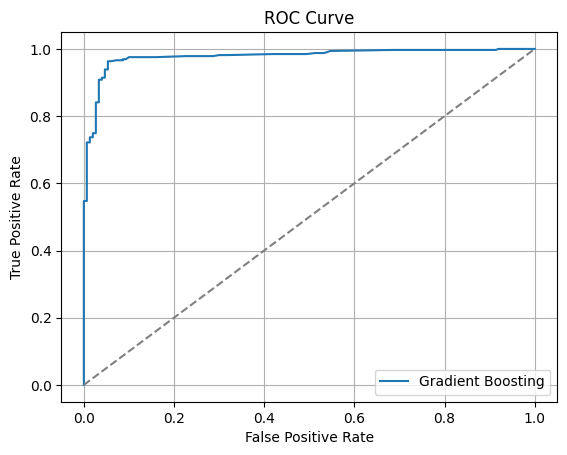

In [51]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label='Gradient Boosting')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


In [52]:
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(y_train, best_gb.predict(X_train))
test_acc = accuracy_score(y_test, best_gb.predict(X_test))

print("Train Accuracy:", train_acc)s
print("Test Accuracy:", test_acc)

if train_acc - test_acc > 0.10:
    print("⚠️ Likely overfitting detected.")


Train Accuracy: 0.9585084033613446
Test Accuracy: 0.9580712788259959


🧠 Interpretation


✅ High accuracy: The model performs very well, with ~96% accuracy on unseen test data.

🧮 AUC of 0.98: Excellent at distinguishing between employees who left vs. those who stayed.

🔁 Balanced recall & precision: Especially strong for detecting employees who left (left_ola = 1).

🔍 Low false negatives: The model rarely misses someone who actually left (only 12 out of 327 cases).